<center><h1>Decision Trees</h1></center> 
<br>Decision trees are an algorithm used for both classification and regression problems. The speciality of this algorithm is it mimics human level thinking so its simple to understand the data and make good interpretations. A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values analogous to an actual tree with branches and leaves. Each internal node of the tree corresponds to an attribute. Each leaf node corresponds to a Class Label. In the decision tree for predicting a class label for a record, we start from the root of the tree. We compare the value of the root attribute with the record’s attribute on the basis of comparison. We follow the branch corresponding to that value & jump to the next node. We continue comparing our record’s attribute value with other internal nodes of the tree until we reach a leaf node.

![](DecisionTree.jpg)

There are a number of core algorithms to construct a decision tree but what I will be showing you in this tutorial will be by the use of CART. Before moving on further, there are two key terms which you need to be aware of :-
<ul>
    <li><h4>Entropy</h4> CART algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely                              homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one. It is                            found by summation of product of probabilities of all occurences and their logarithms. So,<br>
                                  

![](maxresdefault.jpg)

where<br>H(X)=entropy,<br> P(xi)=probability of ith occurence,
    <br>
<ul>
    <li><h4>Information Gain</h4> The information gain is based on the decrease in entropy after a dataset is split on an                                         attribute. Constructing a decision tree is all about finding attribute that returns the                                         highest information gain (i.e., the most homogeneous branches).
        
    

![](gain_form.png)

where<br>
                                     Gain(S,D)=Information Gain of parent node S and child nodes D,<br> H(S)=Entropy before splitting,<br>H(V)=Entropy of child node,<br>V=Number of samples of child node,<br>S=number of samples of parent node

<h3>Regression</h3><br>
So let us cover regression by the use of deision trees first. To perform regression using a decision tree constructed from CART, we replace information gain by standard deviation. Before we move on further let me brush up some important terminologies that we will be using in this algorithm :-
<ul>    
    <li><h6>Standard Deviation(SD)</h6> Gives an approximate measure of the variability of data from the mean point. 
                                It is used for tree building.
    </li>
    <li><h6>Coefficient of Variation(CV)</h6> It is a standardized measure of dispersion of a probability or frequency distribution.<br>
                                      It is used to decide the stopping point in branching.
    </li>
</ul>

![](stand_dev.jpg)

The <b><u>algorithm</u></b> is as follows :-
<ol>
    <li><b>Step 1</b> - The standard deviation of the target is calculated.</li> 
    <li><b>Step 2</b> - The dataset is then split on the different attributes. The standard deviation for each branch is calculated. The resulting standard deviation is subtracted from the standard deviation before the split. The result is the standard deviation reduction. </li>
    <li><b>Step 3</b> - The attribute with the largest standard deviation reduction is chosen for the decision node. </li>
    <li><b>Step 4</b> - The dataset is divided based on the values of the selected attribute. This process is run recursively on the non-leaf branch, until all data is processed.
             <br>As in a recursion, we need a terminating step to ensure that the recursion is brought to a halt at the desired point. For example, when coefficient of deviation (CV) for a branch becomes smaller than a certain threshold (e.g., 10%) and/or when too few instances(n) remain in the branch (e.g., 3). </li>
    <li><b>Step 5</b> - As soon as the terminating criteria is met, branching is stopped. When the number of instances is more than one at a leaf node we calculate the average as the final value for the target.</li>

Based on these steps, our model for regression is prepared.<br>
Now we move on to its implementation.
</ol>

In [8]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [9]:
# Loading the dataset
dataset= pd.read_csv('Heart_rate.csv')
X= dataset.iloc[:,1:2].values
y= dataset.iloc[:,-1].values  

In [10]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
# Initialize and fit the model
regr=DecisionTreeRegressor(random_state=0)
regr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [12]:
# Predicting
y_out = regr.predict(X_test)
y_out

array([348.76, 313.5 , 295.29, 268.07])

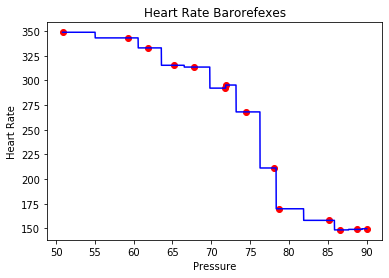

In [13]:
# Plotting Training set result
import numpy as np
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, regr.predict(X_grid), color = 'blue')
plt.title('Heart Rate Barorefexes')
plt.xlabel('Pressure')
plt.ylabel('Heart Rate')
plt.show()

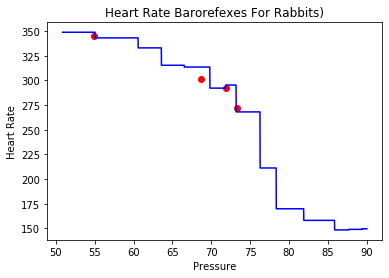

In [14]:
# Plotting Test set result
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regr.predict(X_grid), color = 'blue')
plt.title('Heart Rate Barorefexes For Rabbits)')
plt.xlabel('Pressure')
plt.ylabel('Heart Rate')
plt.show()


<h3>Classification</h3>
<br>
Now we move on to classification using decision trees.  Here we use both the terminologies discussed above i.e. entropy and information gain. The algorithm is as follows :-
    <ol>
    <li><b>Step 1</b> - The entropy of the target is calculated.</li>
    <li><b>Step 2</b> - The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy.</li>
    <li><b>Step 3</b> - The attribute with the largest information gain is chosen as the decision node. The dataset is divided by its branches and the same process is repeated on every branch.</li>
    <li><b>Step 4</b> - A branch with entropy of 0 is a leaf node. A branch with entropy more than 0 needs further splitting.
    </li>
    <li><b>Step 5</b> - The CART algorithm is run recursively on the non-leaf branches, until all data is classified.</li>
Based on these steps, our classification model is built.
    </ol>

In [16]:
#Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split     # to split data into test and train set
from sklearn.tree import DecisionTreeClassifier          # import the Decision tree classifier from scikit learn

In [17]:
#Loading the dataset 
dataset = pd.read_csv('Email_spam.csv')
X = dataset.iloc[:, :-1].values     # predictor attributes
y = dataset.iloc[:, -1].values      # target attributes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.005, random_state=0)

In [19]:
#initialize and fit the Decision tree model
classifier=DecisionTreeClassifier(criterion ='entropy', random_state= 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
# predicting the result
y_out = classifier.predict(X_test)
y_out

# accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_out)
ac

0.8333333333333334